# Unsupervised Learning with Principal Component Analysis

**Goals:** 

- What is PCA (Principal Component Analysis)? How it works and how to use it.
- Visualize and interpret PCA-transformed data
- Work with PCA-transformed data for classification and clustering purposes


## Image 1

![a](images/pca_image.jpeg)

## Image 2

![we](images/pca_image_transformed.jpeg)

**What is the difference between the two images???**

**Answer:** The first image is the high-quality version and the second is the low quality. The first is 16MB and the second 1.2MB

<br>

Given that information, is it fair to say that these two images are effectively the same?

## PCA (Principal Component Analysis)
--- 

* Dimension Reductionality technique that when faced with a large set of correlated variables, allow us to summarize this set with a smaller number of representative variables that **collectively** explain most of the variability in the original set.
* The quintessential "dimensionality reduction" algorithm, where _"dimensionality reduction"_ = process of combining or collapsing your existing features (columns in $X$) into new features that retain the signal in the original data in fewer variables while ideally reducing noise.
* **PCA** is an unsupervised approach, since it involves only a set of features $X_1$, $X_2$, . . . , $X_p$, and no associated response $Y$ 
* **PCA** produces derived variables to use in supervised methods and is also a tool for data visualization. Imagine being able to visualize a 100-dimension dataset on a 2D scatter plot.

- Like the two images above the PCA can transform data with 100 dimensions into 2 while retaining the "essence" of the original data. 



In [1]:
# dimension reduction: reduce columns, but still retain the quality of the data set

From [Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#introduction):

"The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information."

In [3]:
# for example, if you have two highly correlated vars, you don't need both features

* The idea is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting.
* Each of the dimensions found by **PCA** is a linear combination of the $p$ features, so the first principal component of a set of features $X_1$, $X_2$, . . . , $X_p$ is the **normalized** linear combination of the features:
$$Z_1 = φ_{11}X_1 +φ_{21}X_2 +...+φ_{p1}X_p$$
that have the **largest variance**  
The elements $φ_{11}$,...,$φ_{p1}$ are the loadings of the **first** PCA, **AND** together these loadings make up the principal component loading vector whose **SUM** is equal to **1**: $$φ_1 = (φ_{11}  φ_{21} ... φ_{p1})^T$$

### The process
---
* Linearly transform an $𝑁$×$𝑑$ matrix $𝑋$ into an $𝑁$×$𝑚$ matrix $𝑌$
    * Centralized the data (subtract the mean). 
    * Calculate the $𝑑$×$𝑑$ covariance matrix: $$𝐶 = \frac1{N-1} X^T X$$
        * $C_{ij}$ =  $\frac1{N-1}$ $\sum_{q=1}^N$ $X_{q,i}$ $X_{q,i}$ 
        * $C_{i,i}$ (diagonal) is the variance of variable $i$
        * $C_{i,j}$ (off-diagonal) is the covariance between variables $i$ and $j$
    * Calculate the **eigenvectors** of the covariance matrix
         * An **eigenvector** specifies a direction through the original coordinate space. 
    * Select $m$ **eigenvectors** that correspond to the **largest $m$ eigenvalues** to be the new basis.
         * The eigenvector with the highest correspoding **eigenvalue** is the first principal component.
         * **Eigenvalues** indicate the amount of variance in the direction of it's corresponding eigenvector

### Eigenvectors
---
* If $A$ is a **square matrix**, a non-zero vector **$v$** is an **eigenvector** of $A$ if there is a scalar $λ$ **(eigenvalue)** such that $$Av = λv$$

* For example:
$$ Av = 
\left(\begin{array}{cc} 
2 & 3\\
2 & 1
\end{array}\right) *
\left(\begin{array}{cc} 
3 \\ 
2 
\end{array}\right) = 
\left(\begin{array}{cc} 
12 \\
8
\end{array}\right) = 
4
\left(\begin{array}{cc} 
3 \\
2
\end{array}\right)
= λv
$$ 
$~$
* If you think of the squared matrix $A$ as a transformation matrix, then multiply it with the **eigenvector do not change its direction.**

<a href = http://setosa.io/ev/eigenvectors-and-eigenvalues/> Please see Eigenvectors and Eigenvalues Visually </a>

### Visualizing the principal components
---

![](https://snag.gy/ECsJye.jpg)
*Image from Introduction to Statistical Learning*

In [4]:
# X axis explains more of the movements than the y axis

### Summary
---

* What is a principal component? **Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and to be independent (uncorrelated).

* Creating these variables is a well-defined mathematical process, but in essence **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

* Eigenvectors: The direction of the components

* Eigenvalues: The lenght of the Eigenvectors, every eigenvector has an Eigenvalue. The magnitude of the Eigenvector encodes the proportion of total variance explained by a component. The whole variance is the same as the number of variables in the PCA. A value of 1 mean it explains as much variance as one variable. >1 means a component explains more variance than a single variable.

* We can reduce the number of dimensions (remove bottom number of components) and lose the least possible amount of variance information in our data.
* Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
* The directions of largest variance should have the highest Signal to Noise ratio.
* Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.
---
![](https://snag.gy/0Hur9o.jpg)
*Image from http://setosa.io/ev/principal-component-analysis/*

## PCA Lesson Adapted from Sebastian Raschka

In [5]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits

plt.style.use('fivethirtyeight')

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We're going to do a walkthrough on this lesson adapted from [Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#introduction) on how to use PCA with the Iris dataset.

### 1. Standardize the data

In [6]:
#Load data and assign X and y

iris = sns.load_dataset("iris")
X = iris.drop("species", axis = 1)
y = iris.species

In [7]:
#Standardize the data

scaler = StandardScaler()

Xs = scaler.fit_transform(X)

### 2. Eigendecomposition - Computing Eigenvectors and Eigenvalues

"The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes."

**Covariance Matrix**
"The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:"

\begin{align}
\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).
\end{align}

We can summarize the calculation of the covariance matrix via the following matrix equation:

\begin{align}
\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)
\end{align}

Where x¯ is the mean vector \begin{align}\mathbf{\bar{x}} = \sum\limits_{k=1}^n x_{i}.\end{align}

The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [8]:
# eigenvector: direction of the features; eigenvalue: the magnitude

In [9]:
#Use numpy 

mean_vec = np.mean(Xs, axis = 0)

#The mean value of each column
mean_vec

array([ -4.73695157e-16,  -7.81597009e-16,  -4.26325641e-16,
        -4.73695157e-16])

In [10]:
#Manually Calculate the covariance matrix
cov_mat = (Xs - mean_vec).T.dot((Xs - mean_vec))/ (Xs.shape[0] - 1)

cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
#Use numpy
cov_mat = np.cov(Xs.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [12]:
# the diagonal ones are close to 1 (if we do correlation matrix, they will be exactly 1)

In [13]:
#Derive eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_vals

array([ 2.93808505,  0.9201649 ,  0.14774182,  0.02085386])

In [15]:
#2.93 means we get 2.93 feature's importance with the first feature

In [16]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

**Correlation Matrix**

"Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:"

In [ ]:
cor_mat1 = np.corrcoef(Xs.T)
cor_mat1

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

In [ ]:
#Eigenvectors
eig_vecs

In [ ]:
eig_vals

### 3. Selecting Principal Components

"The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes."

"In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top `k` eigenvectors."

In [17]:
# how many principal compnents do we want? we know we don't have to use all features... but how many?

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(2.9380850501999944,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.92016490416248786,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494807,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462054,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [19]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [20]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9380850502
0.920164904162
0.147741821045
0.0208538621765


After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [21]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [22]:
# the first principal component explains 72% of the variance, first two explains 95%,...etc

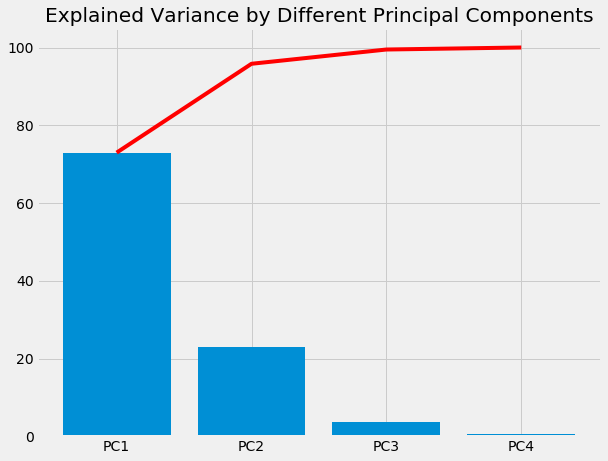

In [23]:
#Plotting variance explained and cumulative variance explained

pc_list =["PC1", "PC2", "PC3", "PC4"]
plt.figure(figsize=(9, 7))
plt.bar([1, 2, 3, 4], var_exp, tick_label= pc_list)
plt.plot([1, 2, 3,4], cum_var_exp, c = "r")
plt.title("Explained Variance by Different Principal Components")
plt.show()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

It's about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our `d×k`-dimensional eigenvector matrix `W`.

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### 4. Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix `W` to transform our samples onto the new subspace via the equation
`Y=X×W`, where `Y` is a 150×2 matrix of our transformed samples.

In [28]:
#Take the dot product of Xs and matrix_w
Y = Xs.dot(matrix_w)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [29]:
#Plot components with color-encoding

colors = y.map({"setosa": "r", "virginica": "g", "versicolor": "b"})
plt.figure(figsize=())
plt.scatter(Y[:, 0], Y[:, 1], c  = colors)

TypeError: from_bounds() takes exactly 4 arguments (2 given)

## PCA in Sklearn with Iris, the NBA, and Digits

We're going to learn how to use PCA with the Iris, NBA 16/17 stats, and MNIST digits datasets.

### Iris

Let's use the pairplot of iris to compare what that looks like to the two components pca scatter plot

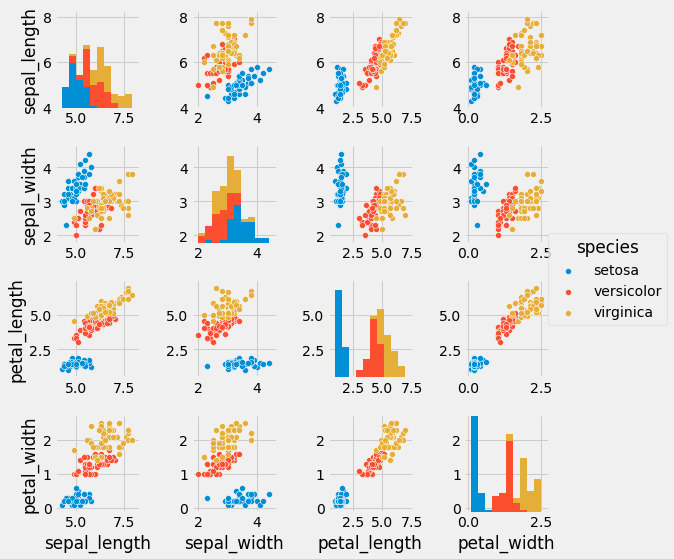

In [30]:
#Pairplot of iris data with species color-encoding
# compare the transformed data with the original

sns.pairplot(iris, hue = 'species', size = 2)


In [31]:
# looks very similar to the original

As we know, we can't visualize a four-dimensional dataset, the pairplot gives use the next best thing, which is visualizing the four-dimensional dataset from as many different perspectives as possible.

Now let's compare this pairplot with a scatter plot of the iris' data two principal components.

In [88]:
#Initialize pca object with 2 components

pca = PCA(n_components=2)

#Fit and transform scaled iris data using pca
iris_pca = pca.fit_transform(Xs)

In [89]:
# the components_ are the eigenvectors. For now, just know that we are using 
# them to transform the data.
first_pc = pca.components_[0]

second_pc = pca.components_[1]

first_pc

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [34]:
#Explained variance
pca.explained_variance_

array([ 2.93808505,  0.9201649 ])

In [35]:
#Explained variance ratio
pca.explained_variance_ratio_

array([ 0.72962445,  0.22850762])

Text(0,0.5,u'Principal Component 2')

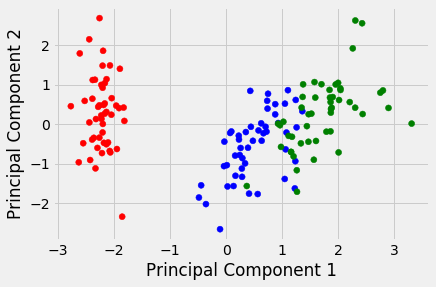

In [36]:
plt.scatter(iris_pca[:,0], iris_pca[:,1], c = colors)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

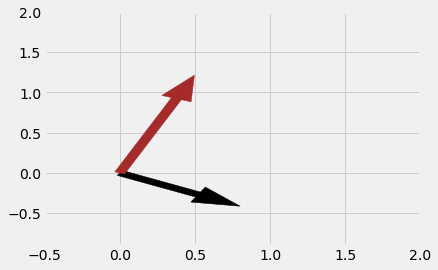

In [37]:
# The points presented above indicates the direction of each PCA. lets plot them to see the direction of each 

x1 = pca.components_[0][0]
x2 = pca.components_[0][1]

y1 = pca.components_[1][0]
y2 = pca.components_[1][1]

plt.axis([-.5, 2, -0.9, 2])
plt.arrow(0,0,x1,x2, color = 'black', width = .07)
plt.arrow(0,0,y1,y2, color = 'brown', width = .07)

 The black arrow shows the direction of the first principal component. the graph above shows the projections of the data into those axes.

In [ ]:
plt.figure(figsize=(9, 7))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c = colors, alpha=.4, s = 50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.arrow(0,0,x1,x2, color = 'brown', width = .1)
plt.arrow(0,0,y1,y2, color = 'black', width = .1)


### NBA Player data

In [47]:
#Load in the wine data


nba = pd.read_csv('../../data/nba_player_data_1617.csv', index_col=[0])

nba.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
Russell Westbrook,81,34.6,31.6,10.2,24.0,42.5,2.5,7.2,34.3,8.8,10.4,84.5,1.7,9.0,10.7,10.4,1.6,0.4,5.4,33.8
James Harden,81,36.4,29.1,8.3,18.9,44.0,3.2,9.3,34.7,9.2,10.9,84.7,1.2,7.0,8.1,11.2,1.5,0.5,5.7,32.4
Isaiah Thomas,76,33.8,28.9,9.0,19.4,46.3,3.2,8.5,37.9,7.8,8.5,90.9,0.6,2.1,2.7,5.9,0.9,0.2,2.8,24.7
Anthony Davis,75,36.1,28.0,10.3,20.3,50.5,0.5,1.8,29.9,6.9,8.6,80.2,2.3,9.5,11.8,2.1,1.3,2.2,2.4,31.1
DeMar DeRozan,74,35.4,27.3,9.7,20.9,46.7,0.4,1.7,26.6,7.4,8.7,84.2,0.9,4.3,5.2,3.9,1.1,0.2,2.4,22.7


In [52]:
#Filter dataset

cols = ["PTS", "OREB", "REB", "AST", "STL", "BLK", "TOV", "MIN", "EFF"]

nba = nba[cols]

nba.head()

,PTS,OREB,REB,AST,STL,BLK,TOV,MIN,EFF
Russell Westbrook,31.6,1.7,10.7,10.4,1.6,0.4,5.4,34.6,33.8
James Harden,29.1,1.2,8.1,11.2,1.5,0.5,5.7,36.4,32.4
Isaiah Thomas,28.9,0.6,2.7,5.9,0.9,0.2,2.8,33.8,24.7
Anthony Davis,28.0,2.3,11.8,2.1,1.3,2.2,2.4,36.1,31.1
DeMar DeRozan,27.3,0.9,5.2,3.9,1.1,0.2,2.4,35.4,22.7


In [54]:
#rename columns

new_cols = ["points", "offensive_rebs", "total_rebounds", "assists", "steals", "blocks",
              "turnovers", "minutes", "efficiency"]

nba.columns = new_cols

First let's examine the correlations between variables

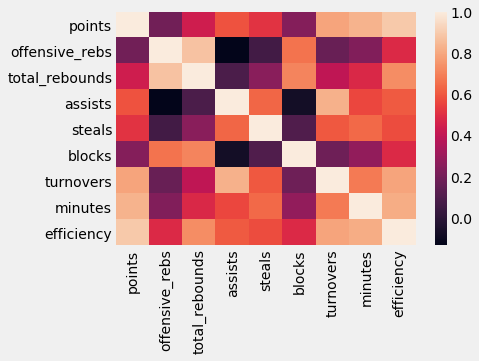

In [55]:
#Correlation heatmap
sns.heatmap(nba.corr())


What do you make of this plot?

One benefit of PCA is that it can deal with multicollinearity pretty well because multicollinearity simply means that you have excess dimensions in your data.

Let's go ahead and transform our data with PCA. But first we have to standardize it.

In [57]:
#Intialize scaler

scaler =StandardScaler()

#Fit and transform wine data using standard scaler
nbas = scaler.fit_transform(nba)


In [58]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone
pca = PCA()

#pca = PCA(n_components=.8)
# ^how many components will explain 80% of the variance?

#Fit and transform wine_s use pca

nba_pca = pca.fit_transform(nbas)

#Number of components
pca.n_components_

9

In [92]:
pd.DataFrame(nba_pca)

,0,1,2,3,4,5,6,7,8
0,8.004364,-2.215297,-0.631168,2.570640,-0.832815,0.861232,-0.012735,-0.682167,0.175418
1,7.629799,-3.048582,-0.740552,2.757061,-0.016325,0.360879,-0.432160,-0.409178,-0.169816
2,3.298166,-2.498697,-1.888910,-0.020775,0.014464,0.541249,0.345678,0.766212,-0.124862
3,5.929081,3.087617,-0.326282,-0.909081,1.711595,1.016168,0.453399,-0.374552,0.082651
4,3.197175,-1.479483,-1.255637,-0.811884,-0.580111,0.662826,0.170836,0.149631,0.099025
5,3.509710,-1.942373,-1.654458,-0.135396,-0.065075,0.090488,0.525154,0.141672,0.056408
6,6.052989,0.929066,-0.286104,0.541484,0.348658,1.016217,-0.270027,-0.597407,0.139588
7,6.197909,-1.634232,-0.980742,1.438939,-0.119760,-0.131662,0.269997,-0.418019,-0.171555
8,3.883559,-0.874823,0.524147,-1.276483,0.113664,1.294268,0.544381,0.254411,-0.090993
9,4.263015,-2.720365,0.370648,-0.039457,-0.356173,0.919561,0.368042,0.353104,-0.100005


We did not reduce any of the dimensions of the dataset because we are going to visualize how much variance is explained by all 9 dimensions.

Plot the variance explained ratio of the components

In [59]:
#Shows the percentage of the variance explained by each component
pca.explained_variance_ratio_

array([ 0.56059991,  0.25067379,  0.05901326,  0.05023642,  0.04141312,
        0.01699684,  0.01197103,  0.00848487,  0.00061077])

We're going to plot a bar plot of the explained variance ratios and a line plot of the cumulative sum of the explained variance ratios.

Text(0,0.5,u'Explained Varianced')

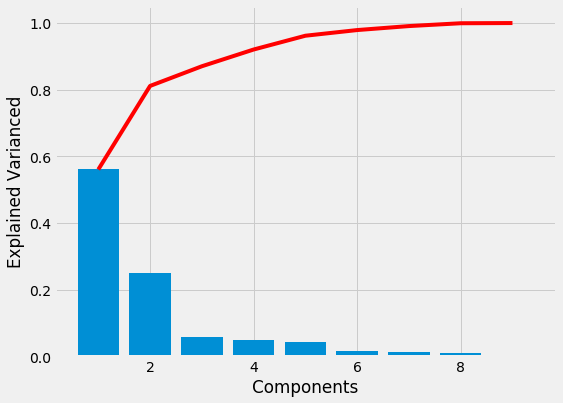

In [60]:
plt.figure(figsize=(8, 6))

components = range(1, pca.n_components_ + 1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

This tell us that if we view this 9-dimension data on a 2D scatter plot then we would be seeing four-fifths of the total variance in the dataset.

In [61]:
players = [u'Russell Westbrook', u'James Harden', u'Isaiah Thomas',
       u'Anthony Davis', u'DeMar DeRozan', u'Damian Lillard',
       u'DeMarcus Cousins', u'LeBron James', u'Kawhi Leonard',
       u'Stephen Curry', u'Kyrie Irving', u'Karl-Anthony Towns',
       u'Kevin Durant', u'Paul George', u'Andrew Wiggins',
        u'John Wall', 'Giannis Antetokounmpo', 'Harrison Barnes',
          'Kevin Love', 'DeAndre Jordan', 'Serge Ibaka', 'Enes Kanter', 'Rudy Gobert', u'Al Horford',
          'Dwight Howard']

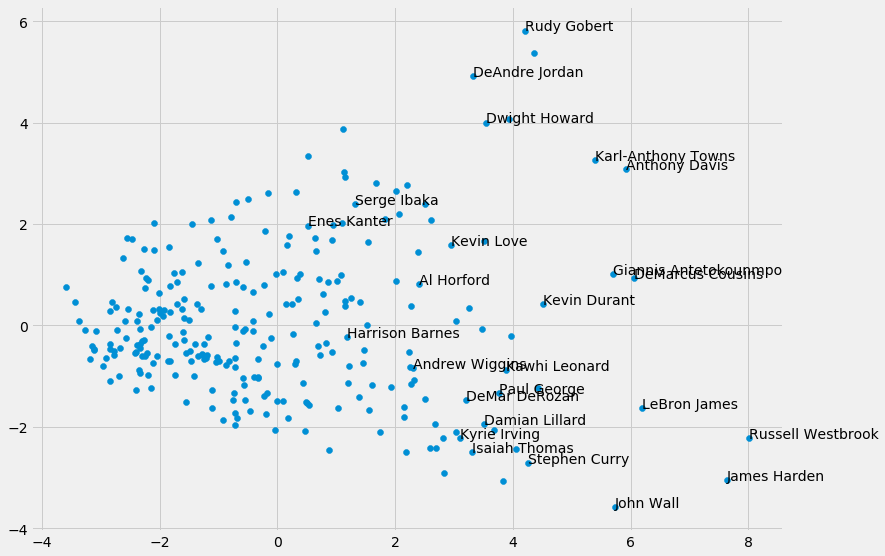

In [63]:
nba_pca_df = pd.DataFrame(nba_pca[:, :2], columns=["pc1", "pc2"], index=nba.index)

plt.figure(figsize=(12, 9))
plt.scatter(nba_pca_df.pc1, nba_pca_df.pc2)
# take the first and second principal component

for player in players:
    data = nba_pca_df.loc[player]
    plt.annotate(player, (data["pc1"], data["pc2"]))

In [65]:
nba_pca_df[nba_pca_df.pc2 >4 ]

# curious about which players have pc2 >4

,pc1,pc2
Hassan Whiteside,4.362308,5.370164
Rudy Gobert,4.211405,5.818062
Andre Drummond,3.940816,4.064075
Dwight Howard,3.546977,4.001549
DeAndre Jordan,3.322419,4.911979


How do you label the components based on the weights?

Let's print out the component weights with their corresponding variables for PC1, PC2, and PC3

In [69]:
#Component 1
for col, comp in zip(nba.columns, pca.components_[0]):
    print col, comp


points 0.389439039074
offensive_rebs 0.206705403903
total_rebounds 0.31267046583
assists 0.297672136011
steals 0.304065286539
blocks 0.210774714484
turnovers 0.382045752216
minutes 0.385337579419
efficiency 0.433489220672


In [68]:
#Component 2
for col, comp in zip(nba.columns, pca.components_[1]):
    print col, comp

points -0.131826414851
offensive_rebs 0.537228172032
total_rebounds 0.436168325695
assists -0.404430722549
steals -0.239805546578
blocks 0.473383884843
turnovers -0.213478518076
minutes -0.104960192114
efficiency 0.0448547392488


In [87]:
# pick the ones that contribute to the components the most (a judgement call)

In [ ]:
#Component 3
for col, comp in zip(nba.columns, pca.components_[2]):
    print col, comp

In [ ]:
# ^ see the components of each component

## Digits

In [70]:
#Load in the mnist digits data


digits = load_digits()
data = digits.data
numbers = digits.target

#shape of data
data.shape

(1797, 64)

Let's PCA the digits data using two components

In [71]:
#Intialize PCA with 2 components
pca = PCA(2)  # project from 64 to 2 dimensions

data_pca = pca.fit_transform(data)

In [72]:
pca.explained_variance_ratio_.sum()

0.2850936482369803

In [73]:
#1797 features, condensed to 2 features. explaines 28% of the variance.

Plot the prinicpal components of the digits dataset using the number labels as the color-encoding

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


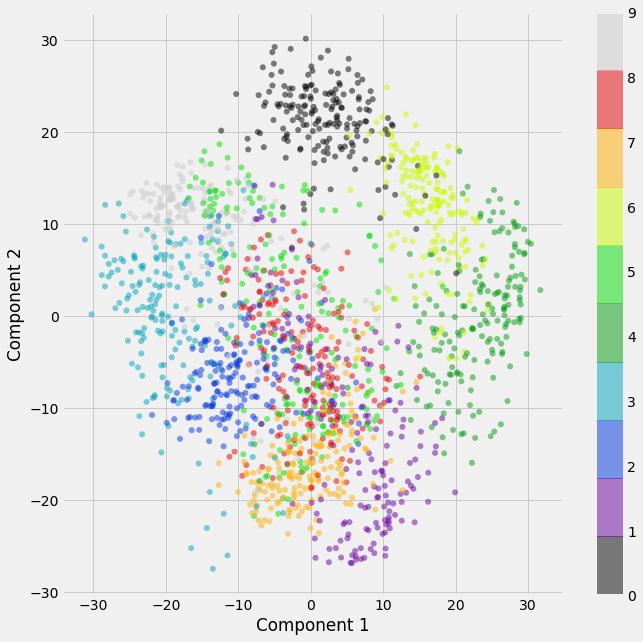

In [74]:

plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=numbers, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [ ]:
#Explained variance of the pca data

pca.explained_variance_ratio_.sum()

2 components gets us about 28.5 of the way there, let's see how many components it takes to get 50, 70, and 90%.

In [75]:
#We can set n_components equal to a explained variance ratio value

#50% EVR
pca = PCA(n_components=.5).fit(data)

#Number components
pca.n_components_

5

In [76]:
#70% EVR
pca = PCA(n_components=.7).fit(data)

#Number components
pca.n_components_

9

In [77]:
#90% EVR
pca = PCA(n_components=.9).fit(data)

#Number components
pca.n_components_

21

Visualize EVR curve

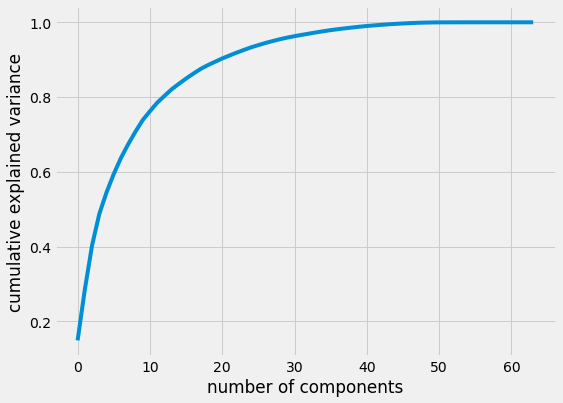

In [78]:
#Intialize and fit digits data using PCA
pca = PCA().fit(data)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [82]:
cross_val_score(LogisticRegression(), data, numbers, cv = 5, scoring = "accuracy").mean()

0.92101881133607011

In [ ]:
# ^ using all features, the model is 92% accurate

In [83]:
pca = PCA(n_components=0.9)
datap = pca.fit_transform(data)
print (datap.shape)

(1797, 21)


In [95]:
pd.DataFrame(datap)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,1.551607,0.854497,-3.338749,5.906590,2.743593,0.419837,-0.898150,0.702611,-3.462119,2.680850
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,-2.129511,-2.555324,-6.516996,-2.291764,-2.134027,-5.839357,4.478446,-1.955703,-5.255708,-1.205777
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,-0.383791,0.208885,6.841040,-1.679690,-4.276003,6.728485,1.269848,0.184780,8.731076,4.951115
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,2.396152,2.653396,-4.538297,0.798339,1.646645,-2.249089,-1.403457,3.068280,-3.876889,0.269413
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,-1.755831,-5.285637,1.515267,-0.666908,-6.412871,-9.514895,-1.975814,-3.065115,5.035236,0.206830
5,-14.087086,7.914448,0.392494,-14.411096,8.484942,-10.863487,-1.412462,7.276308,4.323042,-8.569364,...,6.262294,2.832878,0.486186,5.333819,9.057248,-2.335863,-5.492637,-3.752422,-0.419553,2.222976
6,21.363410,5.288340,15.087405,-5.138381,4.581129,-4.362263,1.345093,-6.201436,-3.910789,2.149197,...,5.166790,-3.782620,-0.448282,0.091033,0.934639,-9.925316,3.023572,0.036474,1.418830,-3.409867
7,-2.952607,-21.071664,-12.282900,10.439277,-6.243046,12.747425,-8.551552,-2.014313,4.004643,10.654946,...,1.635481,0.492019,11.696499,3.255307,-1.575088,0.181414,9.055385,-3.396561,-3.303580,-2.247712
8,-5.255134,1.183360,5.796257,-5.549540,-7.261641,-2.869018,-8.559843,-5.504599,-6.049485,-5.794185,...,3.590770,-3.050730,1.230069,2.246085,0.890473,-4.891269,-7.080386,5.359460,-0.222936,1.664052
9,-5.480199,8.076324,-5.028084,-2.448339,3.288928,-0.775943,-4.548299,6.918049,6.644250,-12.565308,...,-2.817200,-7.798036,1.450362,12.042312,11.622601,0.750258,-8.104629,-5.566889,5.432563,4.392149


In [84]:
# ^ using 21 PCAs, the model explains 90% of the variances

In [93]:
cross_val_score(LogisticRegression(), datap, numbers, cv = 5, scoring = "accuracy").mean()
#use the pca transformed data on a Logistic regression

0.91869192125520072

In [86]:
# ^ can it has a close to 92% accuracy score

In [81]:
pca = PCA(n_components=0.5)
datap = pca.fit_transform(data)
print (datap.shape)

cross_val_score(LogisticRegression(), datap, numbers, cv = 5, scoring = "accuracy").mean()

(1797, 5)


0.80417161649390356

In [ ]:
# use 5 pcas has accuracy score of 80%

## Resources:

- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- http://setosa.io/ev/principal-component-analysis/
- https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
- https://github.com/viniciuspantoja/tutorial_PCA/blob/master/Tutorial_PCA.ipynb
- http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe
- https://towardsdatascience.com/exploratory-data-analysis-into-the-relationship-between-different-types-of-crime-in-london-20c328e193ff
- https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

## In class

1. Use PCA on a supervised learning dataset we've worked with previously to see if PCA-transformed data can produce models as good as the original data.

2. Use time to work on final project.